<a href="https://colab.research.google.com/github/eckatherina/OMM-tasks/blob/main/teplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
#Grid
Nx, Ny, M = 200, 200, 1000
X1, X2 = 0, np.pi*0.333333333333
Y1, Y2 = 0, np.pi*0.5
T1, T2 = 0, 0.1

x = np.linspace(X1,X2,Nx)
y = np.linspace(Y1,Y2,Ny)
t = np.linspace(T1,T2,M)

#Grid 's parameters
h_x = x[1] - x[0]
h_y = y[1] - y[0]
tau = t[1] - t[0]

gamma_x = tau/( h_x **2)
gamma_y = tau/( h_y **2)

u = np.zeros((Nx, Ny, M *2+1))

#Initial condition
for i in range (0, Nx):
  for j in range (0, Ny):
    u[i,j,0]= np.cos(3*x[i])*np.sin(4*y[j])


In [ ]:
#functions

def F_1(i1, i2, j):
  return 0.5*gamma_y*(u[i1, i2 - 1, j - 1] + u[i1, i2 + 1, j - 1]) + (1 - gamma_y)*u[i1, i2, j - 1]

def F_2(i1, i2, j):
  return 0.5*gamma_x*(u[i1 - 1, i2, j - 1] + u[i1 + 1, i2, j - 1]) + (1 - gamma_x)*u[i1, i2, j - 1]

def progonka_x (i2, j) :
 d = np.zeros(Nx)
 sigma = np.zeros(Nx)
 d [1] = 1
 A = 0.5*gamma_x
 B = 1 + gamma_x
 C = 0.5*gamma_x
 for i in range (1, Nx-1):
  Fi = -F_1(i, i2, j)
  d[i +1] = C/(B - A*d[i])
  sigma[i +1] = (Fi - A*sigma[i])/(A*d[i] - B)
 u[Nx - 1, i2, j] = sigma[-1]/(1 - d[-1])
 for m in range (Nx-1, 0, -1):
   u [m-1, i2, j] = d[m]*u[m, i2, j] + sigma[m]


def progonka_y(i1,j):
 d = np.zeros(Ny)
 sigma = np.zeros(Ny)
 d[1] = 0
 A = 0.5*gamma_y
 B = 1 + gamma_y
 C = 0.5*gamma_y
 for m in range (1, Ny-1) :
  Fm = F_2(i1, m, j )
  d[m +1] = C/(B - A*d[m])
  sigma[m+1] = ((-1)*Fm-A*sigma[m])/(A*d[m] - B)
 u[i1, Ny-1, j] = 0
 for i in range (Ny-1, 0, -1):
  u[i1, i-1, j] = d[i]*u[i1, i, j] + sigma[i]



for j in tqdm.tqdm(range(1, 2*M, 2)):
  for i2 in range(1, Nx - 1):
    progonka_x(i2, j)
  u[0, :, :] = u[1, :, :] #ГУ Неймана по x
  u[-1, :, :] = u[-2, :, :]
  u[:, -1, : ] = 0
  u[:, 0, : ]=0
  for i1 in range(1, Ny - 1):
    progonka_y(i1, j+1)



100%|██████████| 1000/1000 [04:52<00:00,  3.42it/s]


In [ ]:
#Analitics
z = np.zeros((Nx, Ny, M))
for i in range (0, Nx):
  for j in range (0, Ny):
    for it in range (0, M):
      z[i, j, it] = np.cos(3*x[i])*np.sin(4*y[j])*np.exp(-25*it*0.0001)

In [ ]:
#Graphics
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

In [ ]:
tau

0.0001001001001001001

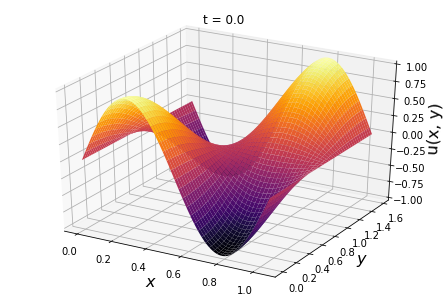

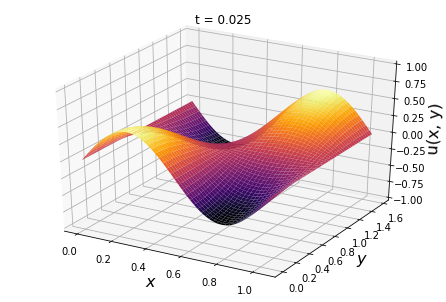

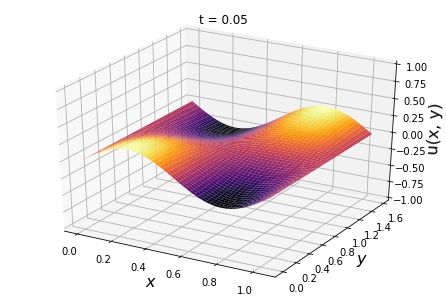

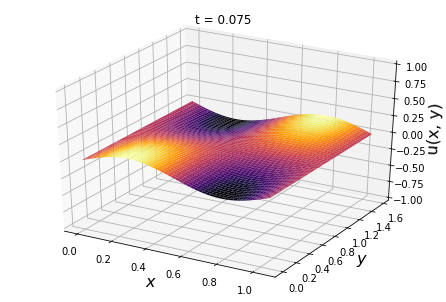

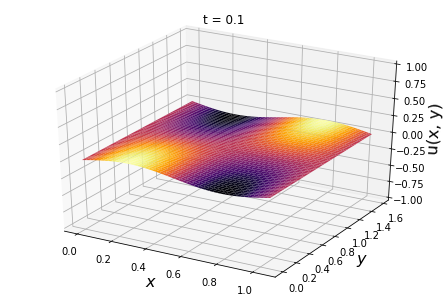

In [ ]:
# численное решение
for i in range (0, 5):
  fig = pylab.figure()
  axes = Axes3D(fig)
  x1, y1 = np.meshgrid(x, y)
  axes.set_zlim3d(bottom = -1, top =1)
  t_const = i*249
  axes.plot_surface(x1, y1, u[:,:,2*t_const], rstride =4, cstride =4, cmap = 'inferno')
  pylab.xlabel('$x$', size = 16)
  pylab.ylabel('$y$', size = 16)
  axes.set_zlabel('u(x, y)', size = 16)
  pylab.title('t = ' + str(round(t_const*0.0001, 3)) + '')
  pylab.show()


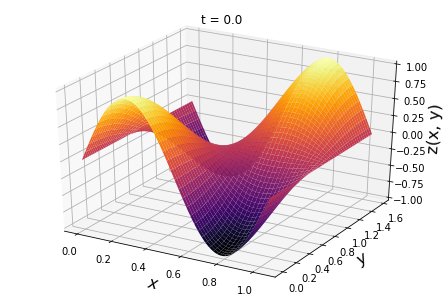

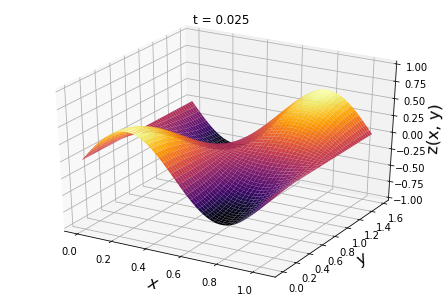

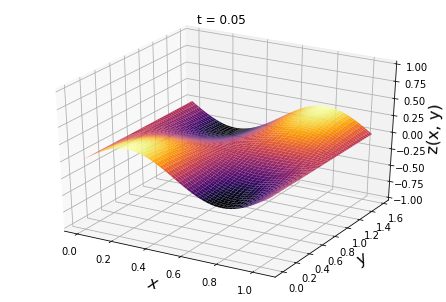

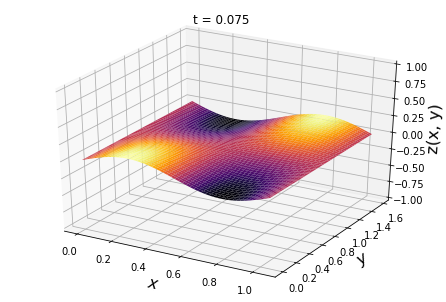

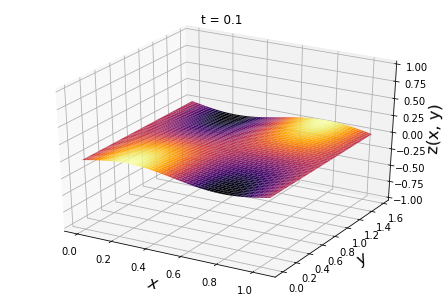

In [ ]:
#аналитическое решение
for i in range (0, 5):
  fig = pylab.figure()
  axes = Axes3D ( fig )
  x1 , y1 = np . meshgrid (x , y )
  axes . set_zlim3d ( bottom = -1 , top =1)
  t_const = i * 249
  axes . plot_surface ( x1 , y1 , z [: ,: , t_const ] , rstride =4 , cstride =4 ,cmap = "inferno" )
  pylab . xlabel ( ' $x$ ' , size =16)
  pylab . ylabel ( ' $y$ ' , size =16)
  axes . set_zlabel ( 'z(x, y)' , size = 16)
  pylab . title ( 't = ' + str ( round ( t_const * 0.0001 ,3) ) + ' ')
  pylab . show()

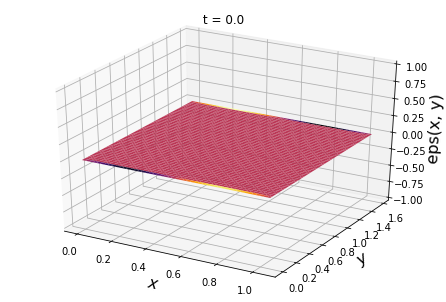

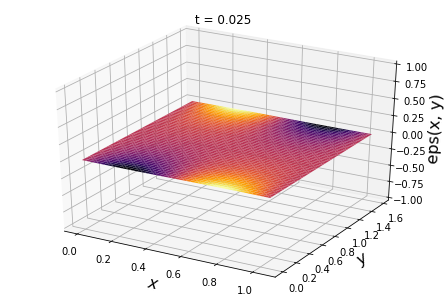

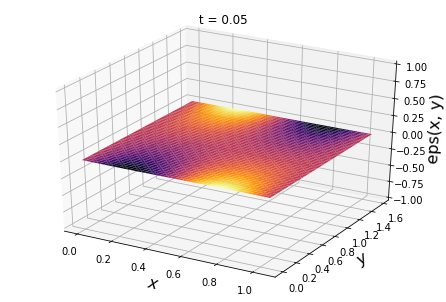

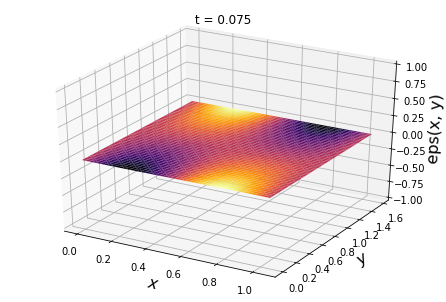

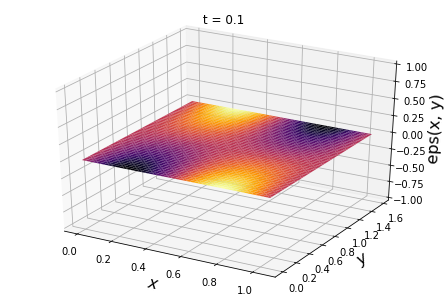

In [ ]:
# разность численного и аналитического решений
for i in range (0 , 5) :
  fig = pylab . figure ()
  axes = Axes3D ( fig )
  x1 , y1 = np . meshgrid (x , y )
  axes . set_zlim3d ( bottom = -1 , top =1)
  t_const = i * 249
  axes . plot_surface ( x1 , y1 , u [: ,: ,2 * t_const ] - z [: ,: , t_const ] ,rstride =4 , cstride =4 , cmap = "inferno" )
  pylab . xlabel ( ' $x$ ' , size =16)
  pylab . ylabel ( ' $y$ ' , size =16)
  axes . set_zlabel ( 'eps(x, y)' , size = 16)
  pylab . title ( ' t = ' + str ( round (t_const * 0.0001 ,3) ) + ' ')
  pylab.show()

In [ ]:
delta = np.zeros((Nx, Ny, M))
error1 = np.zeros(M)
from math import *
for i in range (1, Nx):
  for j in range (1, Ny):
    for k in range (1, M):
      if (u[i][j][k*2] != 0):
        delta[i][j][k] = fabs((z[i][j][k] - u[i][j][k*2])/u[i][j][k*2])
      if (error1[k-1] < delta[i][j][k]):
        error1[k-1] = delta[i][j][k]

In [ ]:
#error1

In [ ]:
#error = np.zeros(M)

error = []
for i in range (1, M):
  error.append([0.0001*i, error1[i-1]*100])

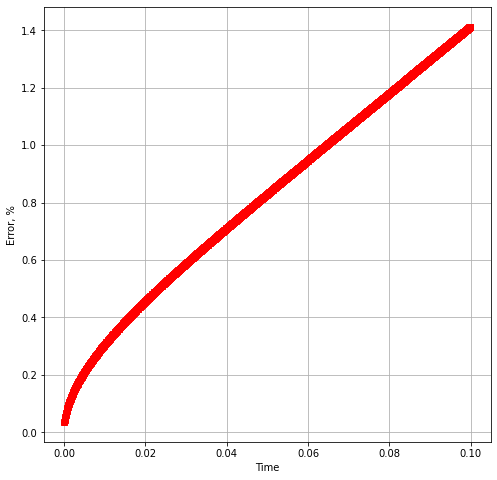

In [ ]:
# относительная разность
plt.figure(figsize=(8,8))
plt.plot(*zip(*error), marker='s', color='r', ls='')
plt.grid()
plt.ylabel('Error, %')
plt.xlabel('Time')

plt.show()

In [ ]:
print(error[-1][-1])

1.4124258490030097


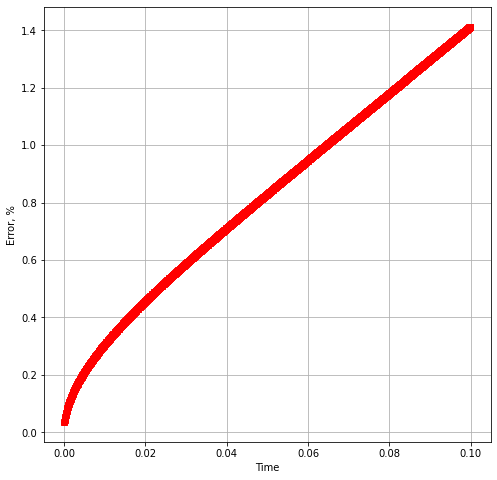

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(*zip(*error), marker='s', color='r', ls='')
plt.grid()
plt.ylabel('Error, %')
plt.xlabel('Time')

plt.show()

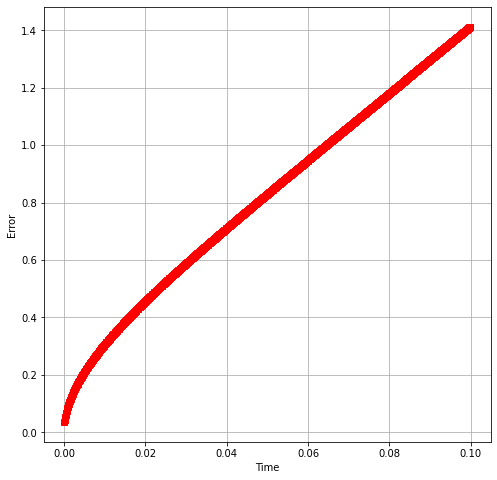

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(*zip(*error), marker='s', color='r', ls='')
plt.grid()
plt.ylabel('Error')
plt.xlabel('Time')

plt.show()

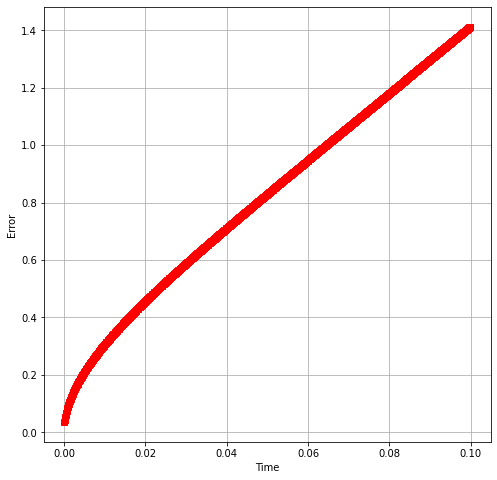

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(*zip(*error), marker='s', color='r', ls='')
plt.grid()
plt.ylabel('Error')
plt.xlabel('Time')

plt.show()